# Convolution Neural Network Homework

This is the 3rd homework assignment for CAP 4630 and we will go through some primary operations for image processsing and implement one of the earilest representative convolution neural network - LeNet-5 . \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
For section 1, when you implement covolution and maxpooling, you are **not** allowed to use built-in functions in Machine Learning libaries such as Scikit-learn Keras, Tensorflow, Pytorch; but you are encouraged to employ Keras for second section.

**Task Overview:**
- Basic operations for Digital Image Processing (DIP)
- LeNet-5 (Google Colab is recommended for implementation)

## 1 - Basic Image Processing ##
### 1.1 Data Preparation

Import packages and prepare image data as an array for image processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import imageio and call imread to convert image to an array.
3. **DISPLAY** the image in the output box before image-array conversion.
4. **PRINT OUT** the size of the array
5. **PRINT OUT** the numeric matrix form of image, i.e. the obtained array after image-array conversion.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [imageio](https://imageio.github.io/) is a python library for basic image reading and writing.

**Hints:**
1. Image data is under current directory, i.e., "./image.jpg".
2. You may consider importing "display" and "Image" from IPython.display for image display.

In [1]:
#PID 5062063
#Zachary Hull
# Import useful libraries
import numpy as np
import imageio
from IPython.display import display, Image
import matplotlib.pyplot as plt

# Display original image
from google.colab import drive
drive.mount('/content/drive')

image = '/content/drive/MyDrive/image.jpg'
display(Image(image))

# # Convert image to array, print out the shape of array, and print out the entire array
img_matrix = imageio.imread(image).astype(float)
print(img_matrix.shape)
print(img_matrix)


Mounted at /content/drive


(30, 30)
[[ 98.  89.  78. 112.  90.  93. 158. 112. 122. 117. 107. 121.  90.  75.
   67.  93.  73.  67.  96. 152. 167. 151. 166. 154. 134. 105.  53.  51.
   55.  44.]
 [ 34.  31.  51.  38.  16.  50. 195. 161. 138. 173. 200. 209. 194. 206.
  222. 237. 223. 195. 177. 185. 167. 160. 166. 169. 136.  98.  49.  54.
   55.  35.]
 [ 78.  84.  94.  71.  81.  69. 190. 204. 233. 240. 249. 234. 232. 241.
  250. 235. 235. 236. 224. 194. 169. 181. 170. 162. 121.  95.  55.  49.
   52.  47.]
 [ 79.  58.  90. 127. 103. 137. 253. 244. 254. 222. 223. 219. 235. 228.
  232. 206. 201. 215. 201. 106. 105. 137. 169. 173. 124.  81.  45.  49.
   59.  53.]
 [ 31.  75.  44.  81.  89. 191. 242. 255. 228. 208. 231. 233. 236. 222.
  227. 199. 177. 192. 208. 104. 137. 109. 170. 194. 159.  88.  44.  54.
   63.  46.]
 [ 85.  66.  51. 145. 129. 225. 239. 206. 242. 233. 247. 231. 210. 218.
  232. 202. 190. 173. 181.  95. 146.  39. 132. 199. 178. 145. 103.  53.
   44.  65.]
 [ 81.  60.  76. 178. 216. 214. 209. 230. 240. 22

<ipython-input-1-3c3aeca2afac>:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_matrix = imageio.imread(image).astype(float)


### 1.2 Implementation of Convolution Filter

Process the obtained array from the image with convolution operation. **(20 Points)**

**Tasks:**
1. Prepare a 3X3 Laplacian kernel (aka Laplacial filter) with array as convolution filter.
2. Conduct convolution on image with prepared kernel.
3. **PRINT OUT** convolution result for first ten rows.
4. **PRINT OUT** the shape of the convolution result.
5. **DISPLAY** convolution result as image with matplotlib. (Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)


**Hints:**
1. Laplacian kernel is widely used for edge detection. Its form is shown below:


![](https://drive.google.com/uc?export=view&id=15bP8KCwHLtglJ-WXV4wolm4m46mCp3HL)

2. You may consider the following steps for this implementation.\
    2.1 Extract all centriods of processing region for each convolution operation.\
    2.2 According to each centroid, locate all indices of the elements within the local region for each convolution operation.\
    2.3 Given obtained indices, locate pixel values (i.e. our obtained array elements) and conduct element-wise product between pixel and kernel values.\
    2.4 Sum element-wise product results and assign the value to convolution result at corresponding location.\
    **Note: we did not conduct padding for processed array, and thus, convolution result will become smaller than original array. You may think about the reason.**
3. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   37.   98.  195.  173.]\
 [ -75.  -80.   56.  -65.  182.]\
 [  96.  -37. -163.   22.   68.]\
 [-101.  121.   81.  148.  -71.]\
 [   7.  127. -141.  159. -127.]]

![](https://drive.google.com/uc?export=view&id=18Iis1mJsvEaojZ7O3f3soE152Szwy8_Z)




[[ 134.   37.   98.  195.  173.]
 [ -75.  -80.   56.  -65.  182.]
 [  96.  -37. -163.   22.   68.]
 [-101.  121.   81.  148.  -71.]
 [   7.  127. -141.  159. -127.]]
(30, 30)


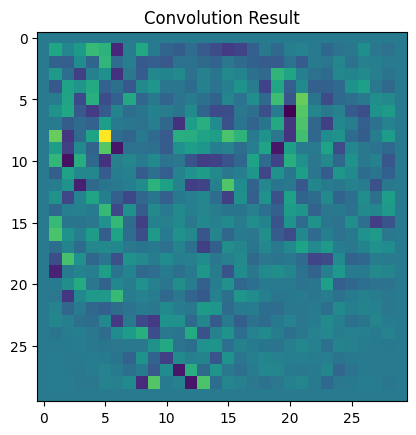

In [2]:
######## Convolution with Laplacian Filter ##################
lap_kern = np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])

result = np.zeros_like(img_matrix)

for i in range(1, img_matrix.shape[0] - 1):
  for j in range(1, img_matrix.shape[1] - 1):
    region = img_matrix[i-1:i+2, j-1:j+2]
    conv = np.sum(region * lap_kern)
    result[i, j] = conv


# Print convolution result for first ten rows
print(result[1:6, 1:6])

# Print shape of the convolution result
print(result.shape)

# Display convolution result as an image
plt.imshow(result)
plt.title('Convolution Result')
plt.show()

### 1.3 Modification on Convolution Scheme

Conduct the convolution with the same filter as above, but change the stride to 2. **(5 Points)**

**Tasks:**
1. Modify the convolution process with stride=2
2. **PRINT OUT** convolution result for first ten rows.
3. **PRINT OUT** the shape of the convolution result.
4. **DISPLAY** convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just reduce the centroid pool according to stride=2, and then, follow the same convolution process above.
    **Note: After increase of stride, the size of convolution result is further shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   98.  173.    5.    3.]\
 [  96. -163.   68.  -10.   37.]\
 [   7. -141. -127.  142.   -6.]\
 [  -1.  -46.  109.  -13.   11.]\
 [ 106.   49.  241.  -26.  -33.]]


![](https://drive.google.com/uc?export=view&id=1UPdXt5cY1umImu2chaQLfWAnqDEpFOGV)


[[ 134.   98.  173.    5.    3.]
 [  96. -163.   68.  -10.   37.]
 [   7. -141. -127.  142.   -6.]
 [  -1.  -46.  109.  -13.   11.]
 [ 106.   49.  241.  -26.  -33.]]
(30, 30)


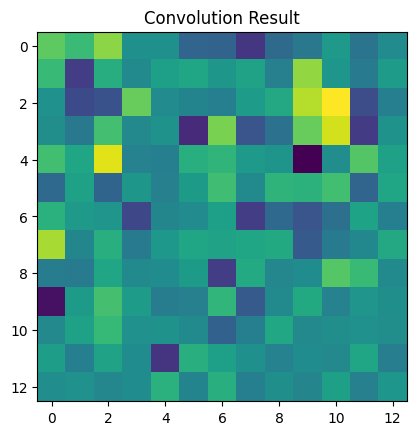

In [3]:
######## Convolution with Laplacian Filter and the setting of stride=2 ##################
stride = 2
row = (img_matrix.shape[0] - len(lap_kern)) // stride + 1
col = (img_matrix.shape[1] - len(lap_kern[0])) // stride + 1

for i in range(0, row * stride, stride):
  for j in range(0, col * stride, stride):
    region = img_matrix[i:i+len(lap_kern), j:j+len(lap_kern)]
    conv = np.sum(region * lap_kern)
    result[i // stride, j // stride] = conv


# Print convolution result for first ten rows
print(result[0:5, 0:5])

# Print shape of the convolution result
print(result.shape)

# Display convolution result as an image
plt.imshow(result[:13, :13])
plt.title('Convolution Result')
plt.show()

### 1.4 Implementation of MaxPooling

Process the obtained array from the image with MaxPooling operation. **(15 Points)**

**Tasks:**
1. Prepare a 2X2 pooling mask.
2. Conduct max pooing on image with prepared mask.
3. **PRINT OUT** convolution result for first ten rows.
4. **PRINT OUT** the shape of the convolution result.
5. **DISPLAY** convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just modify the centroid pool to top-left corner pool, and then, follow the same strategy above.\
    **Note: After the pooling, the size of the array is shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., pooled_results[0:5,0:5].The example figure is below.

[[ 98. 112.  93. 195. 173.]\
 [ 84. 127. 137. 253. 254.]\
 [ 85. 145. 225. 255. 242.]\
 [104. 178. 216. 230. 242.]\
 [ 95. 186. 147. 248. 242.]]

![](https://drive.google.com/uc?export=view&id=1a18IWjrN0xHcp7bSNuj8kUM4JFFj3ebd)



[[ 98. 112.  93. 195. 173.]
 [ 84. 127. 137. 253. 254.]
 [ 85. 145. 225. 255. 242.]
 [104. 178. 216. 230. 242.]
 [ 95. 186. 147. 248. 242.]]
(30, 30)


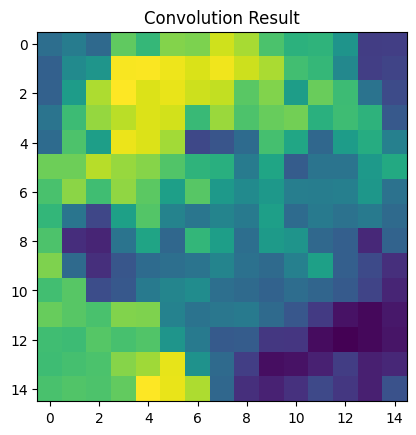

In [4]:
######## MaxPooling with the setting of 2X2 ##################
rows = img_matrix.shape[0] // 2
cols = img_matrix.shape[1] // 2
result3 = np.zeros((rows, cols))

for i in range(0, rows):
  for j in range(0, cols):
    region = img_matrix[2*i:2*i+2, 2*j:2*j+2]

    max = np.max(region)

    result[i, j] = max

# Print convolution result for first ten rows
print(result[0:5, 0:5])

# Print shape of the convolution result
print(result.shape)

# Display convolution result as an image
plt.imshow(result[:15, :15])
plt.title('Convolution Result')
plt.show()


## 2 - Convolution Neural Network ##

In this section, we will use LeNet-5 (LeCun et al., 1998), one of representative deep nueral networks, to solve a  classification problem with Fashion MNIST benchmark.

### 2.1 Library Preparation

Import useful deep learning packages.

**Tasks:**
1. Import numpy and rename it to np.
2. Import torch
3. Import torch.nn.
4. Import torch.nn.functional and rename it to F
5. Import torchvision
6. Import torchvision.tranaforms and rename it to transforms

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms


### 2.2 Training Data Preparation

Import useful packages and prepare Fashion MNIST data. **(20 Points)**

**Tasks:**
1. Download Fashion MNIST data and split it with torchvision.datasets and prepare training/test data sets.
2. Preprocess training/test data with normalization, dimension extension, and zero padding (for LeNet-5 configuration).
3. Preprocess label data to binary class matrices.
4. **PRINT OUT** first image in training set and its correponding label index
5. **PRINT OUT** the shape of total training data, the number of training samples, and the number of test samples.

**Hints**
1. You may consider load function from the reference link. https://pytorch.org/vision/main/datasets.html It provides dataloader function which can tackle downloading and data splitting automatically.
2. For preprocessing transformation, you can check this link: https://nextjournal.com/gkoehler/pytorch-mnist
2. For image display, consider showing the image and label **before dimension extension**.


100%|██████████| 26421880/26421880 [00:01<00:00, 14907585.70it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 263565.53it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4990664.55it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19558221.91it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



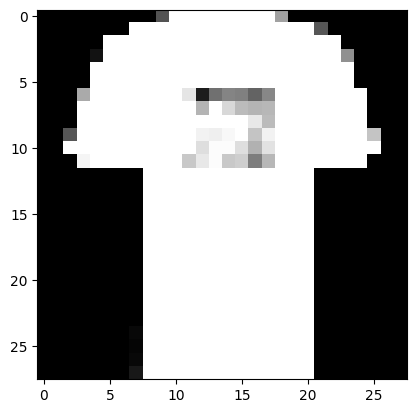

Label:  tensor(0)
Shape of training data:  torch.Size([60000, 28, 28])
training samples:  60000
test samples:  10000


In [6]:
# Define transformation for training and testing data.

# For training, use RandomCrop, RandomRotation and Normalization with mean 0.1307 variance0.3081
# For testing, just use Normalization.
train_transform = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                                                                                              transforms.ToTensor(),
                                                                                              transforms.Normalize((0.1307,), (0.3081,))]))
test_transform = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.Compose([
                                                                                              transforms.ToTensor(),
                                                                                              transforms.Normalize((0.1307,), (0.3081,))]))

# Load the training and testing datasets from Pytorch
train_data = torch.utils.data.DataLoader(train_transform, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(test_transform, batch_size=64, shuffle=True)


# Print out first image and its correponding label index using matplotlib.
load = iter(train_data)
images, labels = next(load)
grid = torchvision.utils.make_grid(images[0], normalize=False, scale_each=True)
plt.imshow(grid.permute(1,2,0))
plt.show()
print("Label: ", labels[0])

print("Shape of training data: ", train_transform.data.shape)
print("training samples: ", len(train_transform))
print("test samples: ", len(test_transform))

### 2.3 LeNet-5

Construct LeNet-5 as learning model for Fashion MNIST classification task. **(15 Points)**

**Tasks:**
1. Build up LeNet-5 by creating a new Net that inherit nn.Module. The class needs to have __init__ and forward functions.

2. **PRINT OUT** the model summary using torchsummary library (import torchsummary).

**Hints:**
1. You may consider the convolution neural network shown in class as an example.
2. The structure of LeNet-5 is listed below. Try to map each step to related processing operation. You can also search some materials to faciliate implementation.
3. Some architecture settings are listed below.
    - To have 32 X 32 input, you need padding=2 for the first 2D convolution filter (original image is 28 X 28)
    - The kernel size for 2D convolution filter is **5 X 5**. You may think about the reason by calculation.
    - We change tanh activation to **"relu"** activation here.
    - We use MaxPooling instead of original AveragePooling. Please use size 2 X 2 for implementation.
    - Please use **Flatten** to onvert 2D convolution layer to 1D fully connected layer.
    - Gaussian connections are replaced with Softmax, and thus, the outputs are activated by Softmax function based on the number of classes.

4. Validation result:
    - Total params: 61,706
    - Trainable params: 61,706
    - Non-trainable params: 0

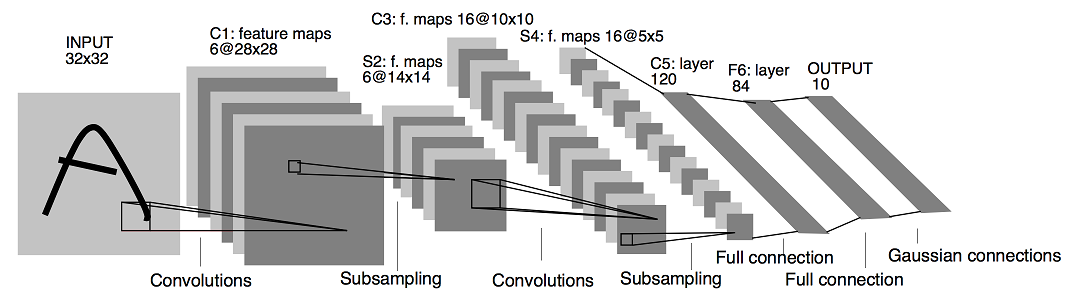

**References:**
- http://yann.lecun.com/exdb/lenet/


In [7]:
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, 1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5, 1, padding=0)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        output = self.fc3(x)
        return output

# Decide whether you want to run your model on cpu or gpu.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
            Conv2d-2           [-1, 16, 10, 10]           2,416
            Linear-3                  [-1, 120]          48,120
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29
----------------------------------------------------------------


### 2.4 LeNet-5 Model Training

Train LeNet-5 model with specific training strategy. **(20 Points)**

**Tasks:**
1. Set batch size to **64** for training.
2. Pick **SGD optimizer** with learning rate of **0.1**, momentum of **0.9**, and **nesterov=True**, for model training.
3. Pick **cross-entropy** loss function for optimization and evaluation metrics is set to **accuracy**.
4. Train the model with **10 epochs** and **PRINT OUT** : **train loss** and **train accuracy** after each epoch.
5. Evaluate model with test data set and **PRINT OUT** : **test loss** and **test accuracy**.

**Hints:**
1. You may consider the examples from Keras to specify optimizer parameters. https://pytorch.org/docs/stable/optim.html
2. You may use the example shown in class to faciliate this implementation.
3. You may see slightly different results every time you run the training. It is normal since there is randomness for training.

In [8]:
### Train with SGD optimizer with learning rate =0.1, regularizer=4e-5, momentum=0.9
batch_size = 64
model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=4e-5, momentum=0.9, nesterov=True)
criterion = nn.CrossEntropyLoss()

In [13]:
### Print out the evaluation results, including test loss and test accuracy.
for epoch in range(10):
  losses_train = []
  correct_train = 0
  losses_test = []
  correct_test = 0

  for var1, var2 in enumerate(train_data):
    data, target = var2
    optimizer.zero_grad()

    # Do forward pass for current set of data
    output = model(data)
    loss_train = criterion(output, target)

    # Computes gradient based on final loss
    loss_train.backward()
    losses_train.append(loss_train.item())

    # Optimize model parameters based on learning rate and gradient
    optimizer.step()

    # Get predicted index by selecting maximum log-probability
    pred = output.argmax(dim=1, keepdim=True)

    for i in range(len(target)):
      correct_train += (pred[i] == target[i]).item()

  #compute the average loss and training accuracy
  train_loss = float(np.mean(losses_train))
  train_acc = correct_train / ((var1+1) * batch_size)

  #display the average loss and accuracy for the training set
  print(epoch + 1)
  print('Train set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        float(np.mean(losses_train)), correct_train, (var1+1) * batch_size,
        100. * correct_train / ((var1+1) * batch_size)))

  #calculate test loss and accuracy
  with torch.no_grad():
    for varA, varB in enumerate(test_data):
      data, target = varB

      # Do forward pass for current set of data
      output = model(data)
      loss_test = criterion(output, target)

      # Computes gradient based on final loss
      losses_test.append(loss_test.item())

      # Get predicted index by selecting maximum log-probability
      pred = output.argmax(dim=1, keepdim=True)

      for i in range(len(target)):
        correct_test += (pred[i] == target[i]).item()

  #compute the average loss and training accuracy
  test_loss = float(np.mean(losses_test))
  test_acc = correct_test / ((varA+1) * batch_size)

  #display the average loss and accuracy for the training set
  print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        float(np.mean(losses_test)), correct_test, (varA+1) * batch_size,
        100. * correct_test / ((varA+1) * batch_size)))




1
Train set: Average loss: 0.3939, Accuracy: 51576/60032 (86%)
Test set: Average loss: 0.4136, Accuracy: 8500/10048 (85%)

2
Train set: Average loss: 0.3755, Accuracy: 51841/60032 (86%)
Test set: Average loss: 0.4456, Accuracy: 8495/10048 (85%)

3
Train set: Average loss: 0.3691, Accuracy: 52085/60032 (87%)
Test set: Average loss: 0.4141, Accuracy: 8486/10048 (84%)

4
Train set: Average loss: 0.3737, Accuracy: 52024/60032 (87%)
Test set: Average loss: 0.4044, Accuracy: 8611/10048 (86%)

5
Train set: Average loss: 0.3633, Accuracy: 52184/60032 (87%)
Test set: Average loss: 0.4155, Accuracy: 8631/10048 (86%)

6
Train set: Average loss: 0.3658, Accuracy: 52177/60032 (87%)
Test set: Average loss: 0.4140, Accuracy: 8603/10048 (86%)

7
Train set: Average loss: 0.3632, Accuracy: 52248/60032 (87%)
Test set: Average loss: 0.4361, Accuracy: 8525/10048 (85%)

8
Train set: Average loss: 0.3595, Accuracy: 52394/60032 (87%)
Test set: Average loss: 0.4084, Accuracy: 8673/10048 (86%)

9
Train set: Ave

In [ ]:
#2.5 Bonus Session

### 2.5 Visualization (Bonus session, optional)

Use T-sne to visualize the validation clustering result. **(10 Points)**

**Hint:**
1. Use 'sklearn' python package.
2. Read the instruction from 'sklearn.manifold.TSNE' and the paper, https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf to understand the idea.
3. Visualize the model's prediction on the testing set using T-sne.

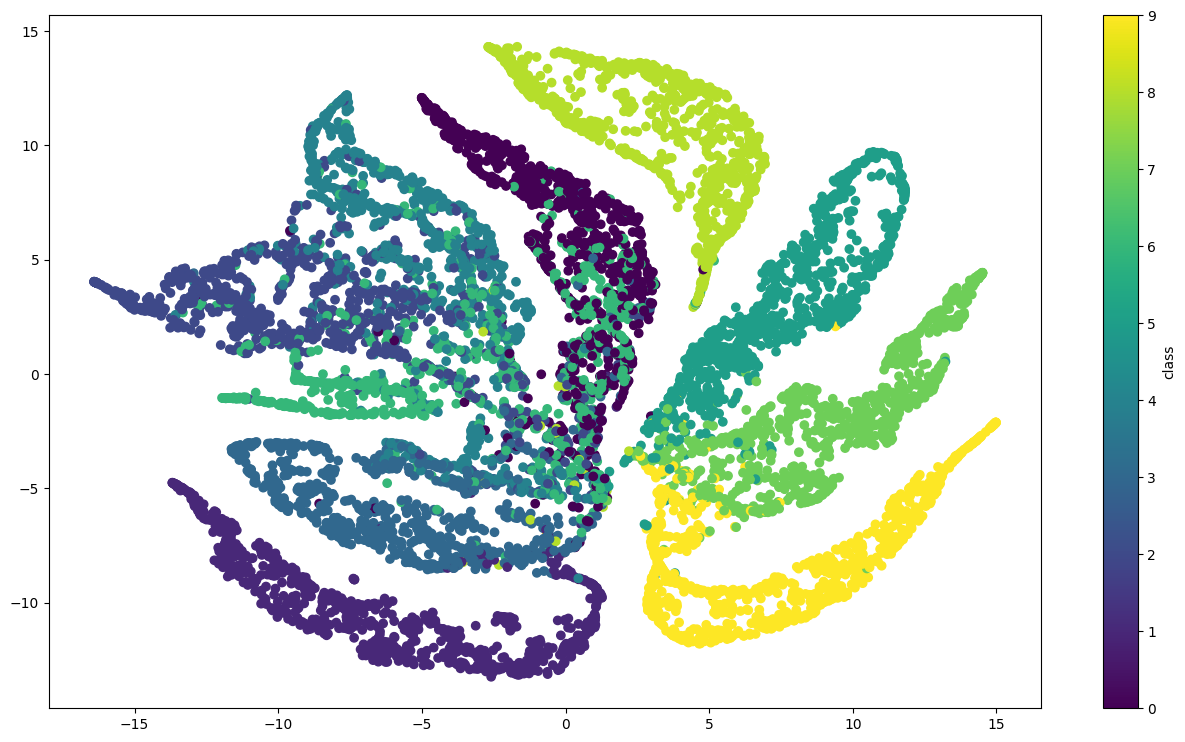

In [15]:
import sklearn as sk
import matplotlib
from sklearn.manifold import TSNE

predict = []
store = []


for varA, varB in enumerate(test_data):
  data, target = varB

  output = model(data)
  predict.extend(output.detach().numpy())
  store.extend(target.numpy())


predict = np.array(predict)
store = np.array(store)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
results = tsne.fit_transform(predict)

plt.figure(figsize=(16, 9))
plt.scatter(results[:, 0], results[:, 1], c=store, cmap='viridis')
plt.colorbar(label="class")
plt.show()